In [ ]:
import importlib
import sys
sys.path.append("..")

import openagent
from openagent.llms._openai import OpenAI as guidance_llm

from dotenv import load_dotenv
load_dotenv()

llmcc = guidance_llm(
    model="gpt-3.5-turbo"
)
llmtc = guidance_llm(
    model="text-davinci-003"
)

In [ ]:
chat_template = '''
                {{#user~}}
                I want to translate the following English text into Python code:
                QUERY: {{input}}
                {{~/user}}

                {{#assistant~}}
                Sure, I can assist with that. If I need more information, I'll ask for clarification.
                {{~/assistant}}

                {{#user~}}
                Yes, go ahead and write the complete code.
                {{~/user}}

                {{#assistant~}}
                {{gen 'response' temperature=0 max_tokens=3900}}
                {{~/assistant}}

                {{#assistant~}}
                If the context or the task is not clear, please provide additional information to clarify.
                {{~/assistant}}'''

In [ ]:
from openagent.agent.chat import ChatAgent

agent = ChatAgent(
    llm=llmcc,
    prompt_template=chat_template,
    )

In [ ]:
# gpt_prompt = """
# We are writing snake in python. MVC components split in separate files. Keyboard control.
# Make food pellet orange. Always have 2 food pellets on the screen at any time.
# Make pellets move, by changing position every 5 seconds in any of the 8 directions by 1 cell.
# Make the game grid 50 by 50 cells.
# Display score in the upper right corner. Snake eating 1 pellet adds 100 to the score.
# """

gpt_prompt = """Write a simple program to get fibonacci of 20."""
# gpt_prompt = """Generate Python code to calculate the Fibonacci sequence up to 20 terms and return a formatted string representation of the sequence."""

res = agent.run(input=gpt_prompt)

In [ ]:
print(res)

In [ ]:
code = f"""{res.split('```')[1].replace('python', '')}"""
print(code)
print(type(code))


print('Below is graph is very useful')
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4, 6, 12])
plt.show()

start_time  1692185305.1339025


'Below is graph is very useful'

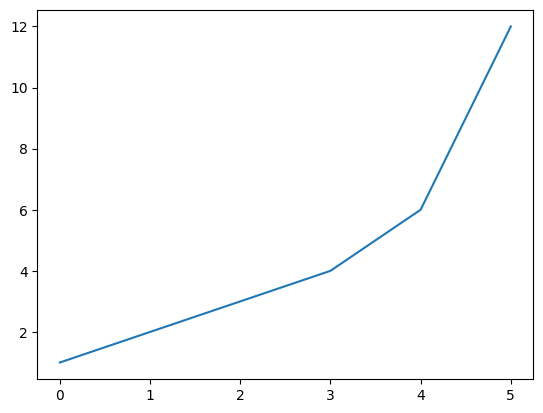

Code execution completed


In [4]:
c = """
print('Below is graph is very useful')
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4, 6, 12])
plt.show()
"""

# c = """print('hello from', 7)
# print('new line')
# print([1, 2, 3, 4])"""
print(c)


%run agentbox.py --code "{c}"

start_time  1692184891.799972


'Below is graph is very useful'

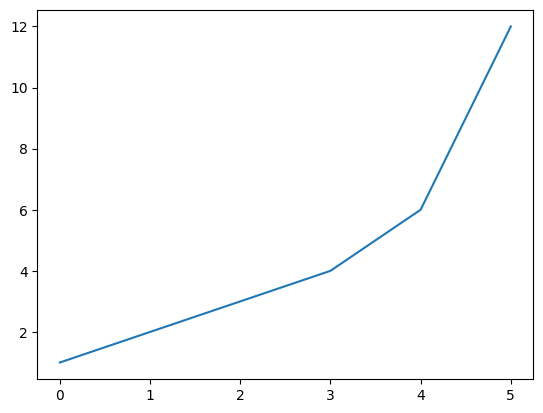

Timeout: Code execution took too long.


In [3]:
%run agentbox.py --code None

In [ ]:
from jupyter_client import KernelManager
from IPython.display import display
import subprocess
import ast
import time



def install_dependencies(code):
    try:
        # Parse the code to extract import statements
        parsed_ast = ast.parse(code)
        imports = [node.names[0].name.split('.')[0] for node in ast.walk(parsed_ast) if isinstance(node, ast.Import) or isinstance(node, ast.ImportFrom)]
        
        print(imports)
        if imports:
            subprocess.check_call(["pip", "install"] + imports)
            return True
        else:
            print("No dependencies detected.")
            return True
    except subprocess.CalledProcessError:
        print("Dependency installation failed.")
        return False


def run_python_code_in_kernel(code):
    # Create a kernel manager
    km = KernelManager(kernel_name='python3')  # Use the appropriate kernel name
    print(km)
    # Start the kernel
    km.start_kernel()

    # Connect to the kernel
    kc = km.client()
    kc.start_channels()

    # Execute the code in the kernel
    kc.execute(code)
    
    # Initialize start_time
    start_time = time.time()

    # Wait for the execution to finish
    while True:
        msg = kc.get_iopub_msg()
        msg_type = msg['header']['msg_type']
        
        if msg_type == 'execute_result':
            output_data = msg['content']['data']
            
            if 'text/plain' in output_data:
                display(output_data['text/plain'])
            elif 'text/html' in output_data:
                display(output_data['text/html'])
            elif 'image/png' in output_data:
                display(output_data['image/png'])
            elif 'image/jpeg' in output_data:
                display(output_data['image/jpeg'])
            # Add more cases for other output types as needed
            
            break

        # Check for execution errors
        if msg_type == 'error':
            print("Execution error:")
            error_content = msg['content']
            print(error_content['ename'])
            print(error_content['evalue'])
            print(error_content['traceback'])
            break
        
        # Add a timeout to avoid an infinite loop
        if time.time() - start_time > 60:  # Set an appropriate timeout (e.g., 10 seconds)
            print("Timeout: Code execution took too long.")
            break

    # Stop the kernel
    kc.stop_channels()
    km.shutdown_kernel()


# Main function
def main():
    # Define Python code generated by your AI model
    # generated_code = code
    generated_code = """
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.show()
"""

    # Install dependencies
    if install_dependencies(generated_code):
        # Run the generated code in the Jupyter kernel
        run_python_code_in_kernel(generated_code)

if __name__ == "__main__":
    main()


In [ ]:
%run agentbox.py